# Simple Linear Regression - TASK #2
## To explore Supervised Machine Learning


In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression tasks involving just two variables.

Independent variable - Hours & 
Dependent variable - Percentage score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


## View data details

In [3]:
data.shape

(25, 2)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the given data. 

## Exploratory Data Analysis

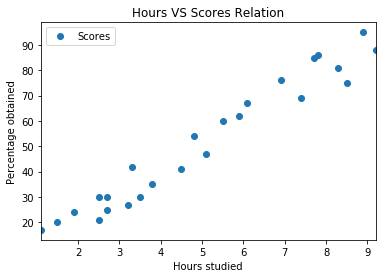

In [7]:
#Plotting how percentage scores varies with number of hours studied
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours VS Scores Relation')
plt.xlabel('Hours studied')
plt.ylabel('Percentage obtained')
plt.show()

The graphs shows that their is linear relationship between hours studied and percentage obtained. Hence we will be using Linear Model-LINEAR REGRESSION to build our model .

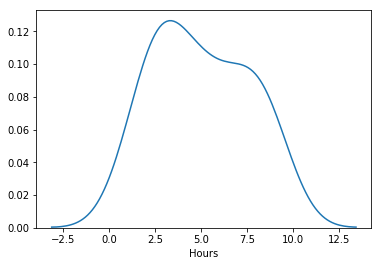

In [8]:
sns.distplot(data['Hours'],hist=False)

## Data Preparation

In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
#Splitting the data into train set and test set to build our model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=96)

Thus, 20% of the data will be used to test our algorithm and 80% of the data will be used to train our algorithm. 

## Training the algorithm

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

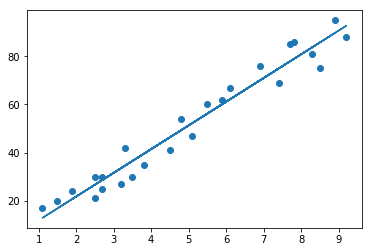

In [14]:
#plotting the regressor line
line=regressor.coef_ * x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Predictions

In [15]:
y_pred=regressor.predict(x_test)

### Comparing predicted values and actual values

In [16]:
table=pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
table

,Actual,Predicted
0,60,56.210087
1,81,83.796179
2,21,26.653560
3,30,26.653560
4,24,20.742255


## Predicting the output (Percenatge score) for 9.25 hours

In [17]:
hours_studied = ([[9.25]])
pred_output = regressor.predict(hours_studied)
print("Number of hours studied = {}".format(hours_studied))
print("Predicted Percentage score = {}".format(pred_output[0]))

Number of hours studied = [[9.25]]
Predicted Percentage score = 93.15574619699801


## Evaluating the Algorithm

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.7687673725173108
Mean Squared Error: 15.191272334130678
Root Mean Squared Error: 3.8975982776744296
